In [1]:
import sys
sys.path.append('../../build')

In [67]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import simpl


In [3]:
# read hyperedges
# dataset from https://www.cs.cornell.edu/~arb/data/contact-high-school-labeled/
edges = []
with open("./hyperedges-contact-high-school.txt", 'r') as file:
    for line in file:
        edge = list(map(int, line[:-1].split(',')))
        edge.sort()
        edges.append(edge)

In [4]:
labels = []
with open("./node-labels-contact-high-school.txt", 'r') as file:
    for line in file:
        labels.append(int(line))

In [5]:
edges[:10]

[[205, 258, 292],
 [3, 7, 42, 47],
 [65, 117],
 [292, 303],
 [9, 269],
 [9, 285],
 [170, 195],
 [203, 208, 256],
 [59, 99],
 [51, 196, 314]]

In [6]:
labels[:10]

[9, 9, 3, 3, 8, 8, 3, 3, 7, 7]

In [33]:
labeled_edges = list(map(lambda row: list(map(lambda x: labels[x-1], row)), edges))

In [34]:
labeled_edges[:10]

[[7, 7, 7],
 [3, 3, 3, 3],
 [3, 3],
 [7, 7],
 [7, 7],
 [7, 7],
 [5, 5],
 [6, 6, 6],
 [5, 5],
 [4, 5, 4]]

In [7]:
D = 5 # max dimension

Hypergraph

In [8]:
H = simpl.HyperGraph()
for edge in edges:
  H.AddEdge(edge)

In [9]:
for i in range(D+1):
  print(i, H.BettiNumber(i))
  

0 0
1 7491
2 0
3 0
4 0
5 0


In [10]:
h_betw = H.BetweennessAll(0, 1, False)
h_betw = sorted(h_betw, key=lambda x: x[1], reverse=True)

In [11]:
h_betw[:10]

[([60], 0.03007035321281539),
 ([107], 0.025993014808097226),
 ([72], 0.025147896653035712),
 ([75], 0.02095856955918012),
 ([9], 0.020712402645143454),
 ([122], 0.019022720952827744),
 ([49], 0.017585914251701407),
 ([51], 0.016253558897382996),
 ([108], 0.01516989895156739),
 ([287], 0.015096278950348195)]

In [65]:
h_eigs = H.EigenValues(1, 0, 2, False, 100)
h_eigs

[168.2912502544276,
 138.97308516316693,
 136.85874502438318,
 132.85140992013723,
 132.52188027527308,
 129.8017669631052,
 126.81015355262612,
 125.08837239326932,
 120.52122518455128,
 119.75928803509578,
 119.17807781772423,
 117.6726444605161,
 117.16871262102276,
 116.44100621869794,
 115.35182635550657,
 114.06791311907337,
 113.22055959481484,
 111.23296997671447,
 110.1584801223838,
 109.58573761780787,
 107.56119205240272,
 107.33556430678686,
 106.09837815107726,
 105.94399642834155,
 104.43672390257285,
 104.2394911180194,
 103.62446007432686,
 102.58224294284886,
 102.15102228689243,
 101.20044365589467,
 100.40479048718275,
 99.8659044313875,
 99.04809465568522,
 98.59882308335321,
 98.4646049753108,
 96.54497931127348,
 95.6033263290991,
 95.23815340381748,
 94.87095830042549,
 94.73726078443669,
 93.94290059979949,
 93.15646641449321,
 92.56598881095947,
 92.1856410488201,
 91.41949112043888,
 90.71351007253689,
 89.96925122721372,
 89.60009397374209,
 89.41494188618829

Graph

In [12]:
G = simpl.Graph()
for edge in edges:
  for v in edge:
    for u in edge:
      if v != u:
        G.AddEdge(v, u)

In [13]:
for i in range(D+1):
  print(i, G.BettiNumber(i))
  

0 1
1 5492
2 0
3 0
4 0
5 0


In [14]:
g_betw = G.BetweennessAll(0, 1, False)
g_betw = sorted(g_betw, key=lambda x: x[1], reverse=True)

In [15]:
g_betw[:10]

[([60], 0.030070353212815374),
 ([107], 0.0259930148080972),
 ([72], 0.025147896653035705),
 ([75], 0.02095856955918014),
 ([9], 0.020712402645143454),
 ([122], 0.019022720952827747),
 ([49], 0.0175859142517014),
 ([51], 0.016253558897382996),
 ([108], 0.015169898951567383),
 ([287], 0.015096278950348195)]

In [62]:
g_eigs = G.EigenValues(1, 0, 2, False, 100)

Comb complex


In [44]:
ranks = []
def getDiversity(x):
  return len(set(x))

for edge in labeled_edges:
  ranks.append(getDiversity(edge))
  
C = simpl.CombinatorialComplex()

C.BuildWithRank(edges, ranks)

In [45]:
for i in range(D+1):
  print(i, C.BettiNumber(i))

0 0
1 -271
2 1693
3 0
4 0
5 0


In [48]:
c_betw = C.BetweennessAll(2, 3, False)
c_betw = sorted(c_betw, key=lambda x: x[1], reverse=True)

In [49]:
c_betw[:10]

[([127, 163], 0.00023258806420207485),
 ([77, 127], 0.0001553824228489853),
 ([127, 135], 0.00013207505942163748),
 ([127, 186], 5.863258612192179e-05),
 ([72, 80], 2.427850357015395e-05),
 ([124, 127], 2.330736342734777e-05),
 ([124, 175], 2.330736342734777e-05),
 ([127, 175], 2.330736342734777e-05),
 ([47, 80], 2.1365083141735477e-05),
 ([83, 127], 2.0636728034630856e-05)]

In [63]:
c_eigs = C.EigenValues(1, 0, 2, False, 100)
c_eigs

[11.12310562561766,
 10.906002678080641,
 9.18929037441738,
 8.002546732493071,
 7.294174394482122,
 6.806103083364447,
 6.654438936368631,
 6.46445956215664,
 6.2360679774997925,
 6.156325174658668,
 6.0000000000000036,
 5.999999999999999,
 5.980936588101819,
 5.732050807568876,
 5.30526547667743,
 5.302775637731994,
 5.23606797749979,
 5.23606797749979,
 5.155867092540634,
 4.999999999999998,
 4.999999999999995,
 4.732050807568878,
 4.618033988749897,
 4.561552812808831,
 4.4261170945500075,
 4.414213562373093,
 4.302775637731994,
 4.302775637731994,
 4.302775637731993,
 4.295553694802742,
 4.041954751952713,
 4.000000000000002,
 3.9999999999999996,
 3.9716890105101856,
 3.7697657835889937,
 3.6251730544397733,
 3.6180339887498936,
 3.4142135623730976,
 3.1052316383286644,
 3.089617697838161,
 3.042124107309026,
 3.0000000000000013,
 3.0,
 3.0,
 2.9999999999999987,
 2.9999999999999987,
 2.999999999999998,
 2.977643681720696,
 2.8768943743823385,
 2.7456712445299676,
 2.61803398874989

Simpl complex

In [56]:
S = simpl.SimplicialComplex()
for edge in edges:
  S.AddSimplex(edge)

In [57]:
for i in range(D+1):
  print(i, S.BettiNumber(i))
  

0 1
1 3510
2 157
3 0
4 0
5 0


In [58]:
s_betw = S.BetweennessAll(1, 2, False)
s_betw = sorted(s_betw, key=lambda x: x[1], reverse=True)

In [59]:
s_betw[:10]

[([107, 108], 0.06880666729252481),
 ([126, 177], 0.06110027807963311),
 ([9, 316], 0.057342072669023),
 ([126, 316], 0.05453431143350969),
 ([107, 126], 0.036927039415223774),
 ([13, 259], 0.027276619712004395),
 ([13, 108], 0.026759085847098688),
 ([49, 187], 0.025834513150904508),
 ([47, 80], 0.0249217660526426),
 ([72, 80], 0.024796149986627596)]

In [64]:
s_eigs = S.EigenValues(1, 0, 2, False, 100)
s_eigs

[88.41639369624913,
 85.4577539145092,
 78.68583729283495,
 77.50056044259198,
 73.75792966485442,
 70.81332148974444,
 70.36898036396498,
 69.56612159145094,
 68.851327502759,
 68.47445883841665,
 64.30268049049833,
 63.06898472425596,
 62.48995556393186,
 61.73533394085643,
 60.77476777288053,
 60.03243254911047,
 59.28018259580813,
 58.80010518689867,
 58.549937150882975,
 58.185514995546455,
 57.89971757660558,
 57.643571962299916,
 57.343645323872074,
 57.10447025719637,
 56.593441253082744,
 56.33525891273063,
 55.72356269824026,
 55.052505023927964,
 54.86804105638315,
 54.799232164206465,
 54.39518180573436,
 54.13838727009465,
 54.042749910322186,
 53.691256069992846,
 53.29126362384025,
 53.017445952788314,
 52.682160129634696,
 52.36841296524049,
 52.08885712475304,
 51.96824042959356,
 51.795499057497636,
 51.359912691117565,
 51.14528354077874,
 50.80193166368907,
 50.79182793211407,
 50.39190706764535,
 50.1933927344324,
 49.74373797781568,
 49.55232107386035,
 49.4782352

In [71]:
x = np.arange(start=1, stop=101)

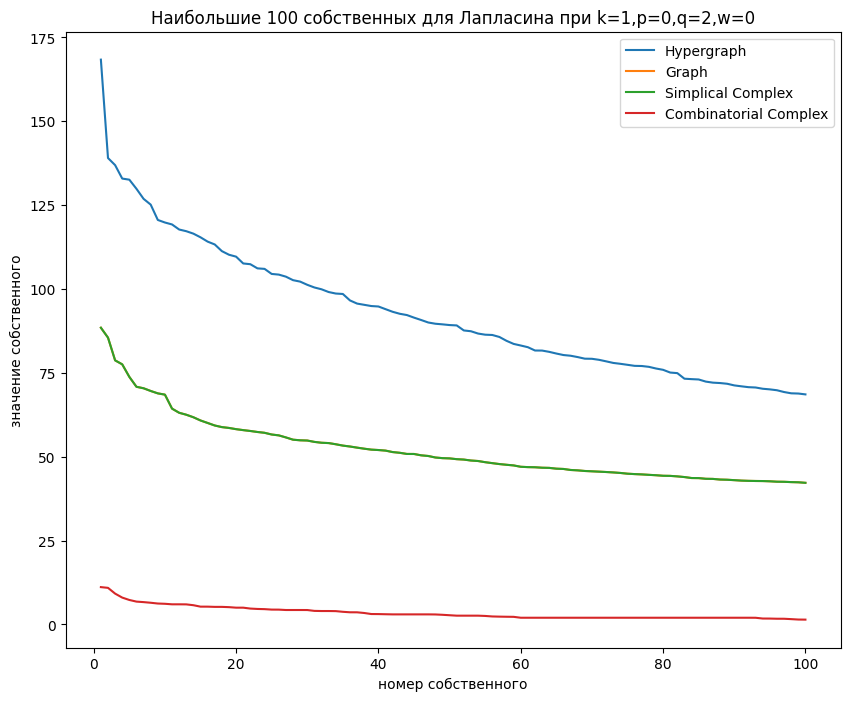

In [72]:
plt.figure(figsize=(10, 8))
plt.plot(x, h_eigs, label ='Hypergraph')
plt.plot(x, g_eigs, label ='Graph')
plt.plot(x, s_eigs, label ='Simplical Complex')
plt.plot(x, c_eigs, label ='Combinatorial Complex')

plt.xlabel("номер собственного")
plt.ylabel("значение собственного")
plt.legend()
plt.title('Наибольшие 100 собственных для Лапласина при k=1,p=0,q=2,w=0')

plt.show()
